In [20]:
import os
from glob import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('ggplot')

from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, GRU, Input
from tensorflow.keras import Model

# Data
* data: train_LITE.csv
    * filter_size: 7
    * stride: 2
    * target_size: 1
* split: train 70%, test 30%, random_state(42)

In [5]:
raw = pd.read_csv('train_LITE.csv')
raw = raw.fillna(0)

In [6]:
X, y = raw.drop('target', axis=1), raw['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42, shuffle=True)

# Machine Learning

In [9]:
model = LGBMRegressor()

In [10]:
model.fit(X_train, y_train)

LGBMRegressor()

In [11]:
mean_squared_error(y_test, model.predict(X_test))

1.4834235079272839e-08

In [12]:
temp1 = y_test.sort_values(ignore_index=True)
idx = temp1.index

In [14]:
temp2 = model.predict(X_test)[idx]

<AxesSubplot:>

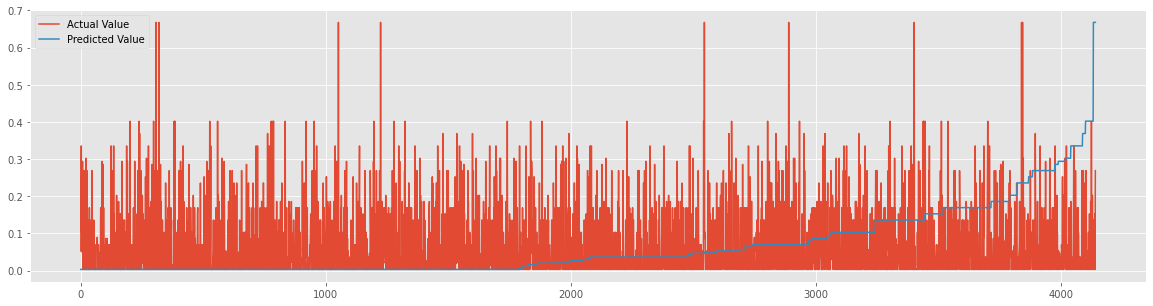

In [15]:
plt.figure(figsize=(20, 5))
sns.lineplot(x=[i for i in range(4140)], y=temp2, label='Actual Value')
sns.lineplot(x=[i for i in range(4140)], y=temp1.values, label='Predicted Value')

# Deep Learning

In [28]:
BATCH_SIZE = 32
TIME_STEP = 12
N_FEATURE = 84
i = Input(batch_input_shape=(BATCH_SIZE, TIME_STEP, N_FEATURE))
lstm_1 = LSTM(128, activation='relu')(i)
dense_1 = Dense(1)(lstm_1)

model = Model(inputs=i, outputs=dense_1)

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
model.fit(x=X_train.values, y=y_train.values, validation_data=(X_test.values, y_test.values))

ValueError: in user code:

    c:\users\outofcage\miniconda3\envs\3.7\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    c:\users\outofcage\miniconda3\envs\3.7\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\outofcage\miniconda3\envs\3.7\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\outofcage\miniconda3\envs\3.7\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\outofcage\miniconda3\envs\3.7\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\outofcage\miniconda3\envs\3.7\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    c:\users\outofcage\miniconda3\envs\3.7\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    c:\users\outofcage\miniconda3\envs\3.7\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    c:\users\outofcage\miniconda3\envs\3.7\lib\site-packages\tensorflow\python\keras\engine\functional.py:386 call
        inputs, training=training, mask=mask)
    c:\users\outofcage\miniconda3\envs\3.7\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    c:\users\outofcage\miniconda3\envs\3.7\lib\site-packages\tensorflow\python\keras\layers\recurrent.py:659 __call__
        return super(RNN, self).__call__(inputs, **kwargs)
    c:\users\outofcage\miniconda3\envs\3.7\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    c:\users\outofcage\miniconda3\envs\3.7\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer lstm_4 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [None, 84]
